<a href="https://colab.research.google.com/github/aliahalotaibi73/week5_exercises/blob/main/GRU_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRU Exercise**

## Import libraries

In [9]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)/ LAB/Dataset/traffic.csv


In [2]:
df = pd.read_csv('/content/traffic.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


## Data Exploration



In [3]:
# I We will use the 'Vehicles' column as our target variable
df = df[['Vehicles']]

In [4]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

In [5]:
# Create sequences for the GRU model
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [6]:
# Define sequence length
seq_length = 90  # Using 90 days of data to predict the next day

# Create the sequences
X, y = create_sequences(scaled_data, seq_length)

In [7]:
# Reshape the data for the GRU model
X = X.reshape((X.shape[0], X.shape[1], 1))

## split into train and test sets

In [8]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

## Model Building



In [10]:
# Build the GRU model
model = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    GRU(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

## Fitting The Model



In [12]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 159s 129ms/step - loss: 0.0021 - val_loss: 9.1887e-04
Epoch 2/10
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 198s 126ms/step - loss: 7.4727e-04 - val_loss: 8.8305e-04
Epoch 3/10
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 153s 128ms/step - loss: 6.3526e-04 - val_loss: 9.1654e-04
Epoch 4/10
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 152s 126ms/step - loss: 6.0801e-04 - val_loss: 8.0621e-04
Epoch 5/10
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 201s 126ms/step - loss: 5.7174e-04 - val_loss: 8.0369e-04
Epoch 6/10
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 203s 127ms/step - loss: 5.5682e-04 - val_loss: 7.7291e-04
Epoch 7/10
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 204s 129ms/step - loss: 5.7302e-04 - val_loss: 7.8117e-04
Epoch 8/10
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 198s 126ms/step - loss: 5.3159e-04 - val_loss: 7.4659e-04
Epoch 9/10
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 154s 128ms/step - loss: 5.1605e-04 - val_loss: 7.9364e-04
Epoch 10/10
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 199s 125ms/step - loss: 5.2461e-04 - val_loss: 7.5960e-04


## Make preductuion and evaluatuin matrix.

In [13]:
predicted = model.predict(X_test)

301/301 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step


In [14]:
# Inverse transform to get actual stock prices
predicted = scaler.inverse_transform(predicted.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

## Visualize the result

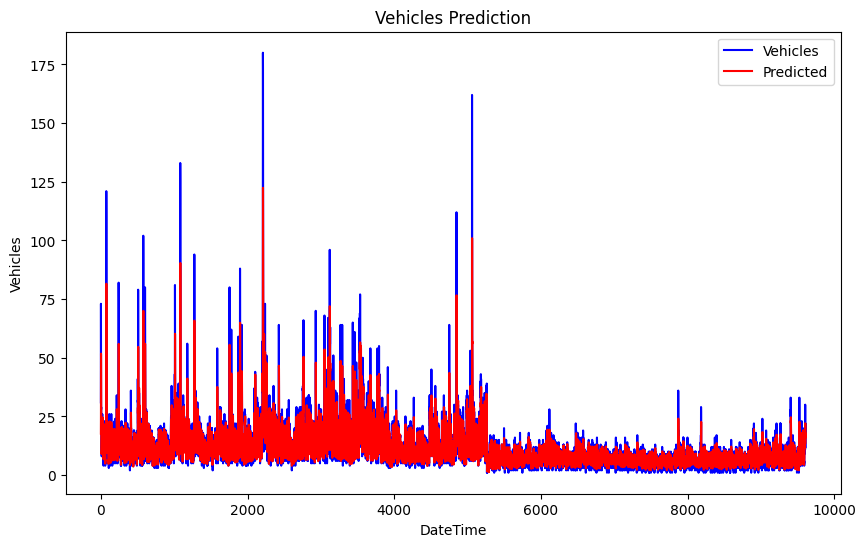

In [16]:
# Plot the results
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Vehicles')
plt.plot(predicted, color='red', label='Predicted')
plt.title('Vehicles Prediction')
plt.xlabel('DateTime')
plt.ylabel('Vehicles')
plt.legend()
plt.show()

# **Well done** :)